For every increase in point per loan, how much more down would you have to increase. 

1. Develop montly mortgage cost given home cost
2. How much more down have to increase (%) for every increase in (%) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
class LoanDown:
    def __init__(self, home_price, loan_amount, loan_interest_rate, 
                 loan_length_in_years, taxes_and_insurance):
        self.home_price = home_price
        self.loan_amount = loan_amount
        self.loan_interest_rate = loan_interest_rate
        self.loan_length_in_years = loan_length_in_years
        self.taxes_and_insurance = taxes_and_insurance
        self.monthly_payment = self.monthly_mortgage()
        self.down_payment = home_price - loan_amount
        
    def monthly_mortgage(self):
        """ 
        monthly mortgage calculator: 
        M= P[r(1+r)^n/((1+r)^n)-1)]
        """
        monthly_interest_rate = self.loan_interest_rate/12
        num_payments = self.loan_length_in_years * 12
        interest_scale =(1+monthly_interest_rate) ** num_payments 
        numerator = monthly_interest_rate * interest_scale 
        denominator = interest_scale-1 
        monthly = self.loan_amount * (numerator/denominator)
        return monthly
    

In [3]:
def monthly_mortgage(loan_interest_rate, loan_length_in_years, loan_amount):
    """ 
    monthly mortgage calculator: 
    M= P[r(1+r)^n/((1+r)^n)-1)]
    """
    monthly_interest_rate = loan_interest_rate/100/12
    num_payments = loan_length_in_years * 12
    interest_scale =(1+monthly_interest_rate) ** num_payments 
    numerator = monthly_interest_rate * interest_scale 
    denominator = interest_scale-1 
    monthly = loan_amount * (numerator/denominator)
    return round(monthly,2)

def complete_monthly_calculator(loan_interest_rate, loan_length_in_years, down_payment,
                                target_home_price, property_tax_rate=1):
    """
    This function helps you identify your monthly cost given:
    - loan parameters (interest rate + loan length)
    - target home price 
    - downpayment 
    """
    # calculate monthly property tax
    mo_property_tax = (target_home_price * property_tax_rate/100)/12
    # calculate monthly mortgage
    loan_amount = target_home_price - down_payment
    mo_mortgage = monthly_mortgage(loan_interest_rate, loan_length_in_years, loan_amount)
    # print(f'Monthly mortgage at: {mo_mortgage}')
    # print(f'Monthly property tax at: {mo_property_tax}')
    total = mo_property_tax + mo_mortgage
    outputs = (total , mo_mortgage, mo_property_tax)
    outputs = tuple(map(lambda x: round(x, 2), outputs))
    return outputs

def max_loan_calculator(loan_interest_rate, loan_length_in_years, monthly_payment_target,
                        target_home_price=None, property_tax_rate=1):
    """
    This function helps you identify the max loan and therefore your required downpayment. 
    You feed in your target home price and the max monthly you're willing to shell out for your home.
    Outputs the loan amount. 
    """
    monthly_property_tax = 0
    if target_home_price is not None:
        monthly_property_tax = (target_home_price * property_tax_rate/100)/12
    monthly_payment_target -= monthly_property_tax
    monthly_interest_rate = loan_interest_rate/100/12
    num_payments = loan_length_in_years * 12
    interest_scale =(1+monthly_interest_rate) ** num_payments 
    numerator = monthly_interest_rate * interest_scale 
    denominator = interest_scale-1 
    loan_amount = monthly_payment_target / (numerator/denominator)
    return round(loan_amount, 2), round(monthly_property_tax, 2)

In [9]:
825705.45


loan_interest_rate = 7.25
loan_length_in_years = 30
down_payment = 815700
target_home_price = 1500000
property_tax_rate = 1.3

monthly = complete_monthly_calculator(loan_interest_rate, loan_length_in_years, down_payment,
                                    target_home_price, property_tax_rate)

print(monthly)


(6293.13, 4668.13, 1625.0)


In [ ]:
1500000-684300

In [ ]:
loan_interest_rate = 7.25

loan_length_in_years = 30
down_payment = 815135
target_home_price = 1500000
property_tax_rate = 1.3

monthly = complete_monthly_calculator(loan_interest_rate, loan_length_in_years, down_payment,
                                    target_home_price, property_tax_rate)

print(monthly)

In [ ]:


rate_df = {}
cost = []
price = []
interest_rate = 7.25
loan_length_in_years = 30
down_payment = 823000
property_tax_rate = 1.25
target_home_price = 1300000
for x in np.linspace(0, 500000, 11):
    home_cost = target_home_price + x
    # if home_cost - down_payment >= 727000:
    #     interest_rate = 6.875
    monthly = complete_monthly_calculator(interest_rate, loan_length_in_years, down_payment,
                                            home_cost, property_tax_rate)
    cost.append(tuple(map(lambda x: round(x, 2), monthly)))
    price.append(target_home_price+x)
costs = list(pd.DataFrame(cost)[0])
rate_df[interest_rate] = costs
            
    

In [ ]:
cp_df = pd.DataFrame({'price': price, 'costs': costs}).set_index('price')
print(cp_df)
cp_df.plot()

In [ ]:
cost = []
price = []
interest_rate = 7.375
for x in np.linspace(0, 500000, 6):
    home_cost = target_home_price + x
    if home_cost - down_payment > 727000:
        interest_rate = 7
    monthly = complete_monthly_calculator(interest_rate, loan_length_in_years, down_payment,
                                            home_cost, property_tax_rate)
    cost.append(tuple(map(lambda x: round(x, 2), monthly)))
    price.append(target_home_price+x)

In [ ]:
df = pd.DataFrame(cost)
df.index = [x/1000000 for x in price]
df.columns = ['total', 'mortgage', 'tax']

df.plot.bar()
plt.xlabel('Price ($M)')
plt.ylabel('Cost ($/mo)')
# plt.title(f'Interest rate at {loan_interest_rate}%')

for idx, val in enumerate(df['total']):
    plt.plot([-1, idx-.1], [val, val], 'k--')

plt.show()


In [ ]:
loan_interest_rate = 6.875
loan_length_in_years = 30
loan_amount = 727000
monthly = monthly_mortgage(loan_interest_rate, loan_length_in_years, loan_amount)

loans = np.arange(0.85,1.15, .01) * loan_amount

monthlys = []
PI=[]
for x in loans:
    interest_rate = 7.375
    if x >= 727000:
        interest_rate = 7
    monthlys.append(monthly_mortgage(interest_rate, loan_length_in_years, x))
    PI.append((700000+x)*.0125/12)

df = pd.DataFrame({'loan_amount': loans, 'monthly_payment': monthlys, 'other': PI})
df['total'] = df['monthly_payment'] + df['other']

In [ ]:
plt.plot(df['loan_amount'], df['total'], label = 'with taxes + ins')
# plt.plot(df['loan_amount'], df['monthly_payment'], label = 'without') 
plt.xlabel('loan amount')
plt.xticks(rotation=45)
plt.ylabel('monthly')
plt.legend()
plt.show()

In [ ]:
monthly_payment_target=7000
loan_interest_rate=7.0
loan_length_in_years=30
target_home_price=1640000
property_tax_rate = 1.25  

loan, monthly_property_tax = max_loan_calculator(loan_interest_rate=loan_interest_rate, 
                                                 loan_length_in_years=loan_length_in_years, 
                                                 monthly_payment_target=monthly_payment_target,
                                                 target_home_price=target_home_price,
                                                 property_tax_rate=property_tax_rate)
print(f'Given a monthly spend of {monthly_payment_target} and a target home price of {target_home_price}...')
print(f'(This includes a monthly property tax of {monthly_property_tax}.)')
print(f'Youll need a down-payment of {np.round((target_home_price-loan),2)}')


# 850k loan max
# 750k 7.00
# below 727k 7.375
# 1% 6000
# 2% 12000 6.875

In [13]:
start = 523000
sold = 850000
no_tax = sold - start

(no_tax/.65) + start


1026076.923076923

In [9]:
max_monthly = 5000 # this parameter doesnt matter in creating the heatmap
current_interest_rate = np.linspace(2,10,17)
future_interest_rate = np.linspace(2,10,17)
mapping = pd.DataFrame()

for current in current_interest_rate: 
    bp = []
    for future in future_interest_rate:
        current_home, _ = max_loan_calculator(current, 
                                                 loan_length_in_years=30, 
                                                 monthly_payment_target=max_monthly)
        future_home, _ = max_loan_calculator(future, 
                                                loan_length_in_years=30, 
                                                monthly_payment_target=max_monthly)
        bp.append(round((future_home/current_home)*100))
    mapping[current] = bp
mapping.index = current_interest_rate

In [ ]:
mapping.to_csv('current_to_future.csv')

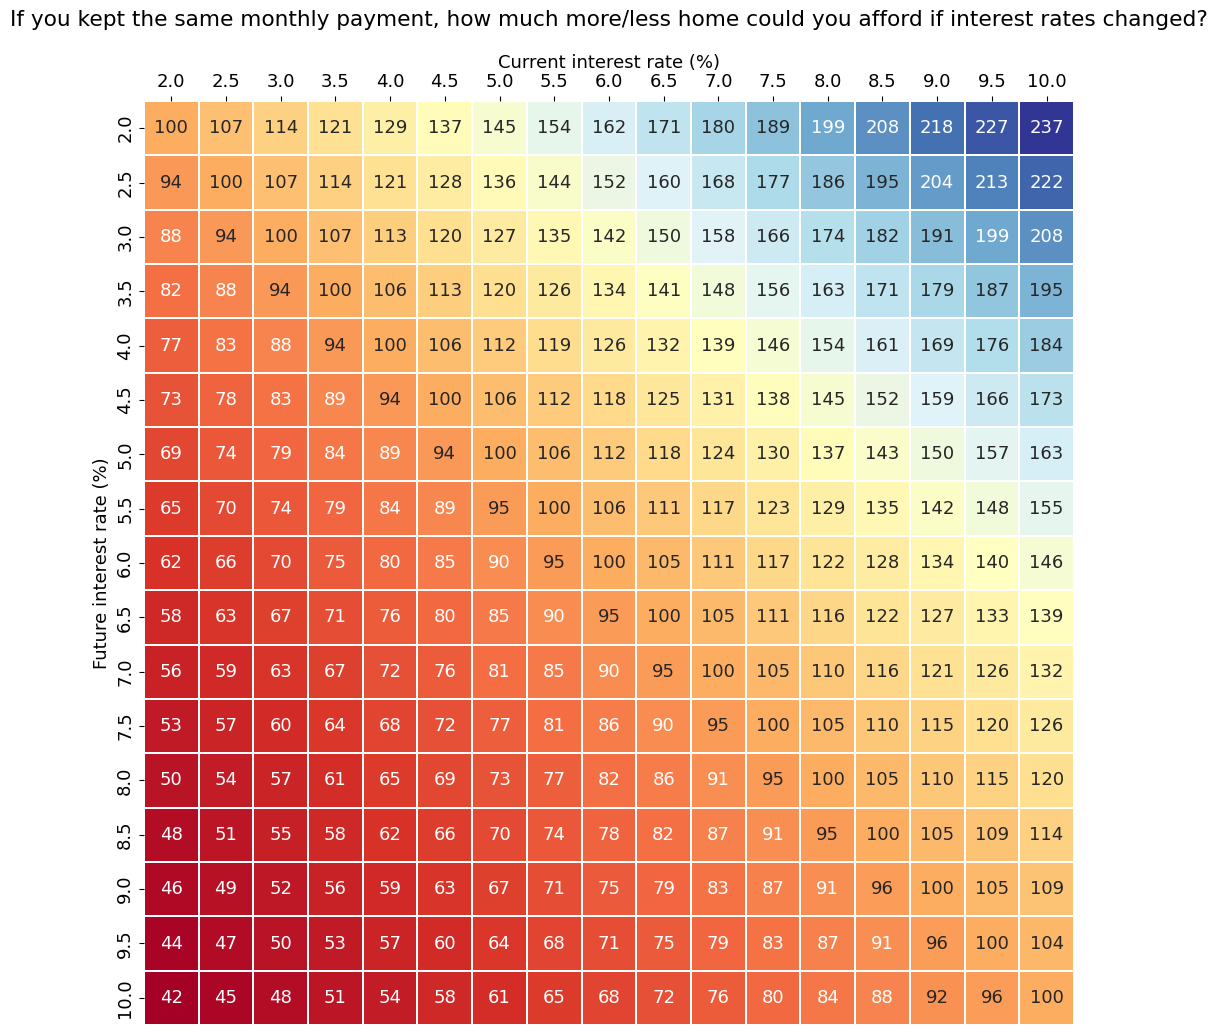

In [10]:
import seaborn as sns
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 13})
ax = sns.heatmap(mapping, cmap ='RdYlBu', linewidths = 0.30, annot = True,fmt='g', cbar=False)
ax.set_xlabel('Current interest rate (%)')
ax.set_ylabel('Future interest rate (%)')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top() 
ax.set_title('If you kept the same monthly payment, how much more/less home could you afford if interest rates changed?', pad=20)
fig = ax.get_figure()
fig.savefig("heatmap.png", facecolor='white', transparent=False) 